**PROJET INFO-F422**

Students:


*   Bryan
*   Maroua
*   Nassim



L'objectif principal est de développer des modèles de régression capables de prédire les angles continus d'articulation de la main (51 valeurs) à partir de signaux d'électromyographie de surface (SEMG) enregistrés sur l'avant-bras d'un participant. Le projet utilise deux ensembles de données : un pour des gestes guidés prédéfinis et un autre pour des gestes libres et naturels.

Shapes Attendues pour la Soumission

* Prédictions pour `guided_testset_X.npy`: **`(1660, 51)`**
* Prédictions pour `freemoves_testset_X.npy`: **`(1540, 51)`**
* Fichier `.csv` final (concaténé): **`(3200, 51)`**

# Data loading

In [ ]:
import numpy as np

user_path = {}
user_path["M"] = ['/content/gdrive/My Drive/INFO-F422 - Project/Guided/guided_dataset_X.npy',
                  '/content/gdrive/My Drive/INFO-F422 - Project/Guided/guided_dataset_y.npy']
user_path['N'] = ['/content/gdrive/My Drive/B. Statistical/Projet/F422 EMG project data/guided/guided_dataset_X.npy',
                  '/content/gdrive/My Drive/B. Statistical/Projet/F422 EMG project data/guided/guided_dataset_y.npy',
                  '/content/gdrive/My Drive/B. Statistical/Projet/F422 EMG project data/guided/guided_testset_X.npy',
                  '/content/gdrive/My Drive/B. Statistical/Projet/F422 EMG project data/freemoves/freemoves_dataset_X.npy',
                  '/content/gdrive/My Drive/B. Statistical/Projet/F422 EMG project data/freemoves/freemoves_dataset_y.npy',
                  '/content/gdrive/My Drive/B. Statistical/Projet/F422 EMG project data/freemoves/freemoves_testset_X.npy']
user_path['B'] = ['OneDrive - Université Libre de Bruxelles/Master 1 Ingénieur Civile/Q2/INFO-F422 - Statistical foundations of machine learning - 202425/INFO-F422-Project/Projet/F422 EMG project data/guided/guided_dataset_X.npy',
'OneDrive - Université Libre de Bruxelles/Master 1 Ingénieur Civile/Q2/INFO-F422 - Statistical foundations of machine learning - 202425/INFO-F422-Project/Projet/F422 EMG project data/guided/guided_dataset_y.npy',
]

# Chemins vers les fichiers
file_pathX = user_path["B"][0]
file_pathY = user_path["B"][1]
file_pathXtest = user_path["B"][2]
file_pathX1 = user_path["B"][3]
file_pathY1 = user_path["B"][4]
file_pathX1test = user_path["B"][5]

IndexError: list index out of range

In [ ]:
try:
  guided_X = np.load(file_pathX)
  guided_Y = np.load(file_pathY)
  guided_Xtest = np.load(file_pathXtest)
  freemoves_X = np.load(file_pathX1)
  freemoves_Y = np.load(file_pathY1)
  freemoves_Xtest = np.load(file_pathX1test)
except FileNotFoundError:
    print(f"Error: File not found at {file_pathY}. Please check the path.")
except Exception as e:
    print(f"An error occurred while loading dataY: {e}")

In [ ]:
print(guided_X.shape)
print(guided_Y.shape)
print(guided_Xtest.shape)
print(freemoves_X.shape)
print(freemoves_Y.shape)
print(freemoves_Xtest.shape)

(5, 8, 230000)
(5, 51, 230000)
(5, 332, 8, 500)
(5, 8, 270000)
(5, 51, 270000)
(5, 308, 8, 500)


On veut les temps sur les lignes et les EMGS/JOINTS en colonnes

In [ ]:
#Reformater en (5, 230000, 8) pour X
dataX = np.transpose(guided_X, (0, 2, 1))
# Reformater en (5, 230000, 51) pour Y
dataY = np.transpose(guided_Y, (0, 2, 1))

# Reformater
dataXtest = np.transpose(guided_Xtest, (0, 1, 3, 2))
dataX1 = np.transpose(freemoves_X, (0, 2, 1))
dataY1 = np.transpose(freemoves_Y, (0, 2, 1))
dataX1test = np.transpose(freemoves_Xtest, (0, 1, 3, 2))

# Vérification des shapes
print("Shape de dataX:", dataX.shape)  # Doit afficher (5, 230000, 8)
print("Shape de dataY:", dataY.shape)  # Doit afficher (5, 230000, 51)
print("Shape de dataXtest:", dataXtest.shape)

Shape de dataX: (5, 230000, 8)
Shape de dataY: (5, 230000, 51)
Shape de dataXtest: (5, 332, 500, 8)


# Data exploration I

In [ ]:
import numpy as np
import pandas as pd

def extract_session_data(dataX, dataY, session_idx=0):
    """
    Extrait les données EMG et Joint Angles d'une session spécifique
    sous forme de DataFrames propres.

    Args:
        dataX (numpy.ndarray): Données EMG (shape: (5, 230000, 8))
        dataY (numpy.ndarray): Données Angles (shape: (5, 230000, 51))
        session_idx (int): Index de la session à extraire (par défaut 0)

    Returns:
        df_emg (pd.DataFrame): DataFrame avec les signaux EMG
        df_joints (pd.DataFrame): DataFrame avec les angles articulaires
    """

    # ----- Signaux EMG -----
    session_data_emg = dataX[session_idx]  # (230000, 8)
    df_emg = pd.DataFrame(session_data_emg, columns=[f'EMG_{i+1}' for i in range(session_data_emg.shape[1])])

    # ----- Angles articulaires -----
    session_data_joints = dataY[session_idx]  # (230000, 51)
    df_joints = pd.DataFrame(session_data_joints, columns=[f'Joint_{i+1}' for i in range(session_data_joints.shape[1])])

    return df_emg, df_joints


# Extrait la session (exemple ici session 0)
df_emg, df_joints = extract_session_data(dataX, dataY, session_idx=0)

# Aperçu des premières lignes

print("Premiers instants des signaux EMG :")
print(df_emg.head(10))

print("\nPremiers instants des angles articulaires :")
print(df_joints.head(10))

Premiers instants des signaux EMG :
       EMG_1       EMG_2       EMG_3       EMG_4      EMG_5      EMG_6  \
0 -15.391379  164.998419  -92.882284  -11.132143 -20.396120   2.404633   
1  -8.199041  103.669520 -103.538782  292.019594   3.311176   8.368227   
2 -21.928099   -3.707502  -64.288298  406.656444   5.816541  19.844184   
3  -3.681031   10.810285  -47.593079  273.587967   6.785855  29.497222   
4  -1.256765  -23.663832  -50.900523  117.424235  -8.957975  26.388973   
5   3.979789  -66.491793  -21.646317   83.554608  -6.632495  28.163401   
6  18.678847  -10.406539   -8.154888   34.564057 -12.284640  38.670833   
7  22.457217   27.532903   12.308421   38.755284 -10.302099  58.190444   
8  19.212660   64.305539   13.064403   42.365071   2.900724  54.238039   
9   2.591973  140.254676  -12.887506  -17.196265  -7.322563  40.260549   

       EMG_7      EMG_8  
0 -14.608326   1.116625  
1  17.365237  -4.234777  
2  23.131649  -4.778484  
3   9.313241   5.775186  
4  -3.621868  10.51

De manière générale, l'ensemble des signaux EMG présente une forte activité, caractérisée par de nombreuses variations rapides, ce qui est typique de l'activité musculaire.
Les signaux provenant des électrodes EMG_1, EMG_7 et EMG_8 apparaissent globalement plus calmes que les autres.
À l'inverse, les signaux EMG_2, EMG_4 et EMG_5 montrent une activité plus marquée, avec des pics d'amplitude importants.
Un bruit de fond, sous forme de légères fluctuations autour de zéro, est observable sur la plupart des canaux, bien que certaines électrodes semblent présenter des signaux plus propres que d'autres.

Visualisation des signaux sur la session 1


Visualization of the EMG signals was performed to gain an initial understanding of their overall behavior and to identify whether any particular EMG channel exhibited different characteristics compared to the others.

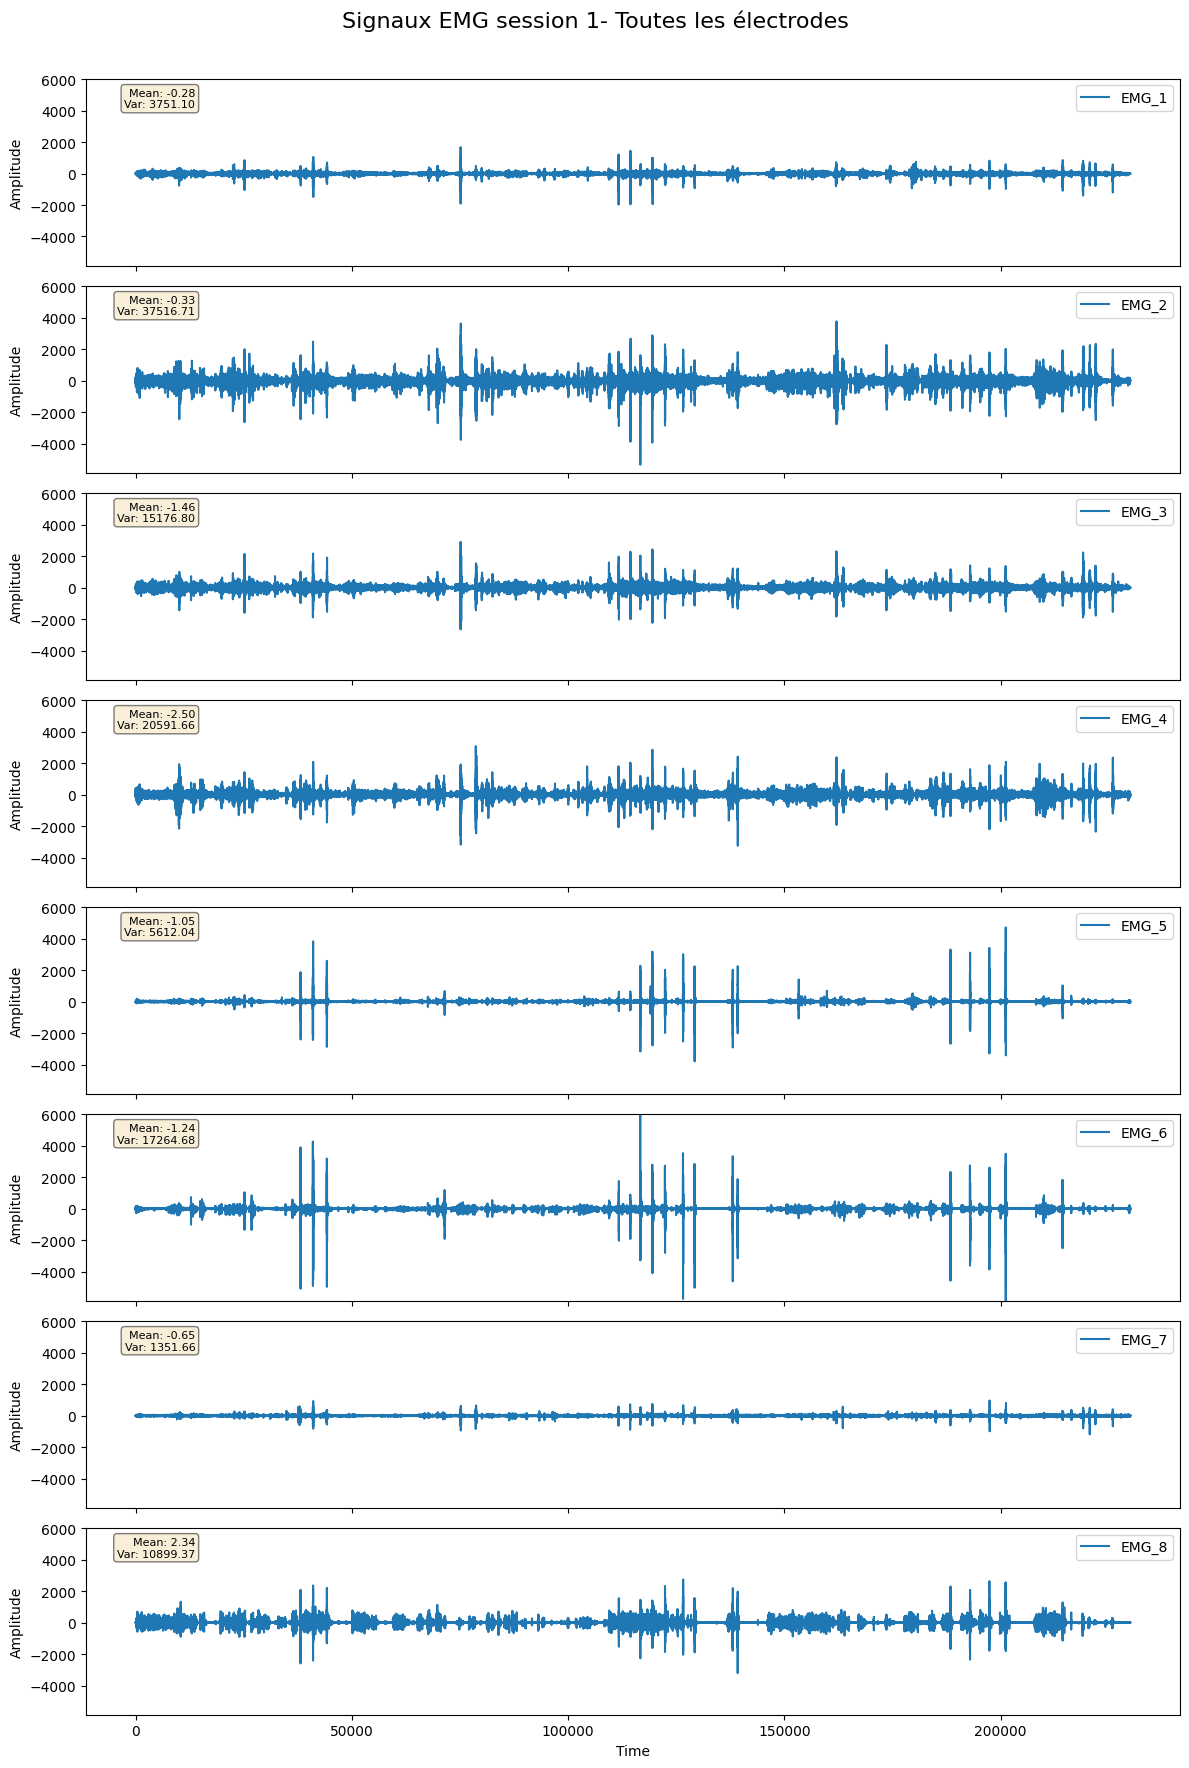

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_emg(df_emg, n_samples=230000):
    """
    Trace les signaux EMG pour toutes les électrodes sur une seule figure.

    Parameters:
    - df_emg: DataFrame contenant les colonnes 'EMG_1', 'EMG_2', ..., 'EMG_8'
    - n_samples: nombre d'échantillons à afficher
    """
    emg_channels = [f'EMG_{i}' for i in range(1, 9)]  # Liste des noms de colonnes
    time = np.arange(n_samples)

    # Calcul min/max globaux pour avoir une échelle uniforme
    y_min, y_max = np.inf, -np.inf
    for channel in emg_channels:
        emg = df_emg[channel][:n_samples]
        y_min = min(y_min, emg.min())
        y_max = max(y_max, emg.max())

    # Création de la figure avec plusieurs sous-graphes (subplots)
    fig, axes = plt.subplots(len(emg_channels), 1, figsize=(12, 18), sharex=True)

    for i, channel in enumerate(emg_channels):
        emg = df_emg[channel][:n_samples]
        mean_val = emg.mean()
        var_val = emg.var()

        ax = axes[i]
        ax.plot(time, emg, label=channel)
        ax.set_ylim(y_min, y_max)
        ax.set_ylabel('Amplitude')
        ax.legend(loc='upper right')

        # Ajouter texte statistiques
        textstr = f'Mean: {mean_val:.2f}\nVar: {var_val:.2f}'
        ax.text(0.10, 0.95, textstr,
                transform=ax.transAxes,
                fontsize=8, verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.xlabel('Time')
    plt.suptitle('Signaux EMG session 1- Toutes les électrodes', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

plot_all_emg(df_emg, n_samples=230000)


# Analyse fréquentielle

Fréquence d’échantillonnage (1024Hz) : signal EMG a été mesuré 1024 fois par seconde.

Comprendre la fréquence d’un signal EMG discret et son utilité pour le nettoyage des données

Ton signal EMG est discret, c’est-à-dire qu’il se compose d’une série de valeurs mesurées à intervalles réguliers. Dans ce projet, les signaux sont échantillonnés à 1024 Hz, ce qui signifie que 1024 mesures sont prises chaque seconde. Même si ce n’est pas un signal continu, on peut analyser comment il varie dans le temps en examinant la fréquence de ses variations.

La fréquence décrit la rapidité des changements dans un signal. Si le signal varie lentement, il est associé à une basse fréquence. Si au contraire il varie très rapidement, on parle de haute fréquence. Pour analyser ces fréquences dans un signal discret, on utilise des outils comme la transformation de Fourier discrète (DFT), qui permet de convertir un signal dans le domaine du temps vers le domaine fréquentiel.

La méthode de Welch, utilisée dans ce contexte via la fonction `scipy.signal.welch`, permet d’estimer la densité spectrale de puissance d’un signal. Elle découpe le signal en segments, applique une DFT sur chaque segment, puis moyenne les résultats. Cela permet d'obtenir un graphe qui indique quelles fréquences sont présentes dans le signal et avec quelle intensité.

Ce graphe, appelé spectre de puissance, est un outil fondamental pour l’analyse de signaux EMG. Il permet d’identifier les bandes de fréquences qui contiennent l’information musculaire utile, typiquement entre 20 et 300 Hz. Il permet également de repérer les fréquences associées à du bruit, comme les très basses fréquences causées par les mouvements de l’électrode ou les hautes fréquences dues à des interférences électroniques.

Dans le cadre du nettoyage des données (data cleaning), analyser ces spectres est très utile. Cela permet de :
- détecter si certaines électrodes capturent peu ou pas de signal utile,
- confirmer que les bandes de fréquence principales sont bien présentes,
- ajuster précisément les filtres passe-bande pour ne conserver que les composantes fréquentielles pertinentes,
- éventuellement repérer des pics suspects liés à des sources de bruit externe (comme le 50 Hz du réseau électrique),
- et éviter d'appliquer un filtrage arbitraire ou inadapté.

En résumé, analyser les spectres permet de mieux comprendre la nature du signal, de justifier les choix de prétraitement, et d’améliorer la qualité des données en réduisant le bruit tout en conservant l’information pertinente pour les modèles d’apprentissage.

------------------------------------

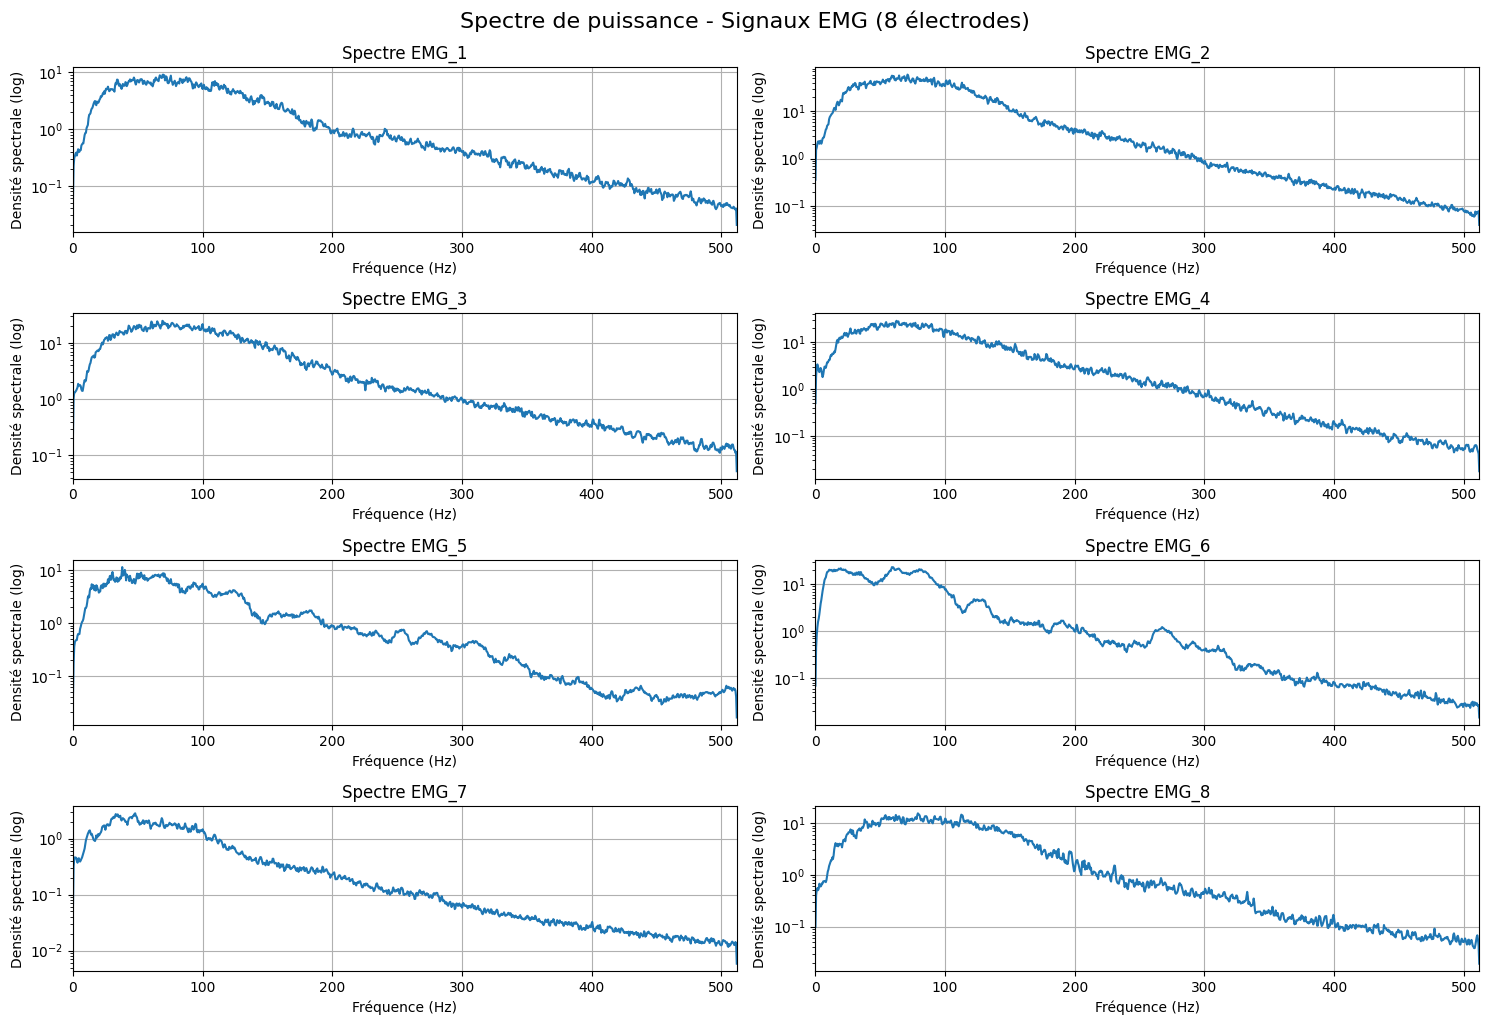

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Paramètres
fs = 1024  # Fréquence d'échantillonnage (Hz)
nperseg = 2048  # Longueur des segments pour Welch

# Extrait les données une seule fois hors de la boucle
df_emg, _ = extract_session_data(dataX, dataY, session_idx=1)

# Création de la figure
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()

# Boucle sur chaque électrode
for i in range(8):
    emg_signal = df_emg[f'EMG_{i+1}'].values  # Récupère la colonne i+1 sous forme de vecteur numpy

    freqs, psd = welch(emg_signal, fs=fs, nperseg=nperseg)

    axes[i].semilogy(freqs, psd)
    axes[i].set_title(f'Spectre EMG_{i+1}')
    axes[i].set_xlim(0, 512)
    axes[i].set_xlabel('Fréquence (Hz)')
    axes[i].set_ylabel('Densité spectrale (log)')
    axes[i].grid(True)

plt.tight_layout()
plt.suptitle('Spectre de puissance - Signaux EMG (8 électrodes)', y=1.02, fontsize=16)
plt.show()


Les signaux EMG contiennent principalement des informations pertinentes dans une plage de fréquences spécifique. Selon les recherches, l'énergie significative du signal EMG se situe généralement entre 20 Hz et 500 Hz. Cette plage est considérée comme la bande passante physiologique du signal EMG (https://www.mdpi.com/1424-8220/21/18/6064)

Voici ce que l’on peut observer sur les spectres affichés :

✅ Points communs positifs
- La majorité des électrodes montrent une **puissance maximale entre 20 Hz et 100 Hz**, ce qui est typique d’un signal EMG sain.
- La puissance chute progressivement à partir de **150–200 Hz**, ce qui suggère que les hautes fréquences contiennent peu d'information utile.

🔍 Observations intéressantes
- **EMG_7** a une puissance **globalement plus faible** et plus plate que les autres. Cela pourrait indiquer une électrode mal positionnée ou un contact moins bon.
- À partir de **450 Hz**, la puissance est négligeable pour toutes les électrodes.

---

✅ Conclusion pour le data cleaning

Sur la base de ces spectres, tu peux :

- Appliquer un **filtre passe-bande** entre **20 Hz et 450 Hz** pour toutes les électrodes. Cela éliminera :
  - Le bruit de mouvement (< 20 Hz),
  - Le bruit électronique (> 450 Hz),
  - Tout en conservant la plage utile pour l’analyse musculaire.

- **Surveiller EMG_7**, qui pourrait affecter la qualité des features extraites si elle reste trop silencieuse.


In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt

# --- Paramètres du filtre ---
fs = 1024        # Fréquence d'échantillonnage (Hz)
lowcut = 20      # Fréquence de coupure basse (Hz)
highcut = 450    # Fréquence de coupure haute (Hz)
order = 4        # Ordre du filtre

# --- Fonction de filtre passe-bande ---
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs  # Fréquence de Nyquist
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data, axis=0)  # Filtrage sur chaque colonne
    return filtered_data

# --- Application sur les 5 sessions ---
dataX_f = []  # Liste finale

for session_idx in range(len(dataX)):  # ✅ Utiliser len(dataX) car dataX peut être list ou np.array
    session_data = dataX[session_idx]  # (230000, 8)

    # S'assurer que session_data est bien un np.array (sécurité supplémentaire)
    session_data = np.array(session_data)

    filtered_session = bandpass_filter(session_data, lowcut, highcut, fs, order)  # (230000, 8)
    dataX_f.append(filtered_session)  # ✅ On ajoute un tableau (230000, 8)

# PAS de np.stack à la fin ! On garde bien une liste.

# Vérification
print("\n✅ Filtrage terminé")
print("Nombre de sessions filtrées :", len(dataX_f))
print("Shape d'une session filtrée :", dataX_f[0].shape)


✅ Filtrage terminé
Nombre de sessions filtrées : 5
Shape d'une session filtrée : (270000, 8)


Le filtrage passe-bande agit sur le contenu fréquentiel du signal,
Pas sur sa longueur :

Il modifie les valeurs du signal (les amplitudes),

Mais il ne supprime pas d’échantillons.

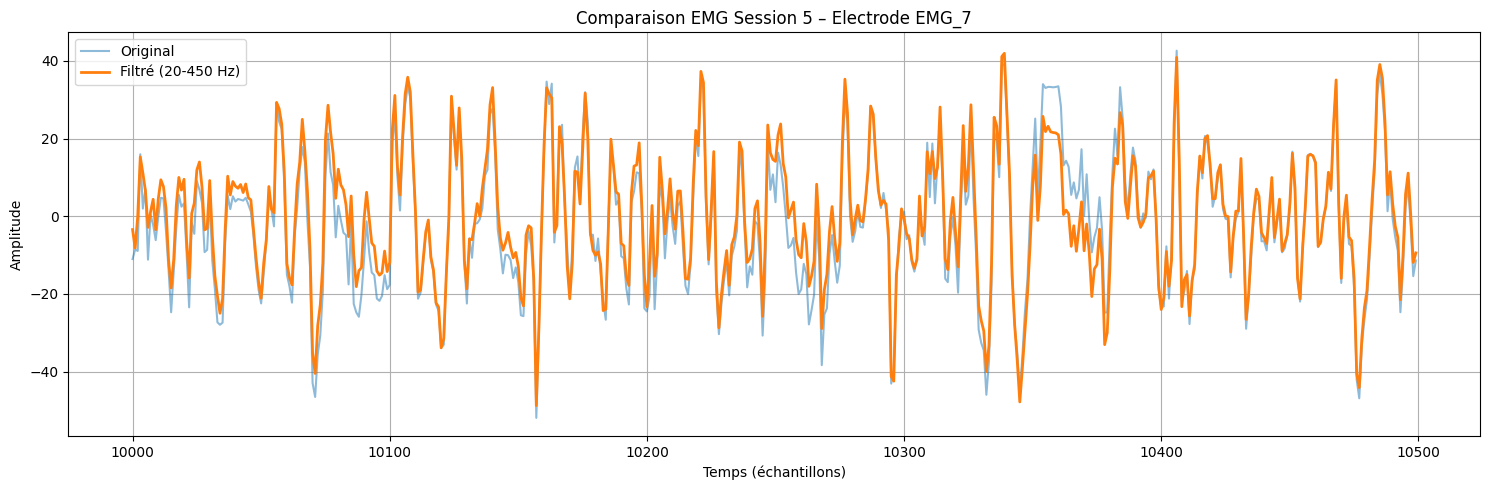

In [ ]:
import matplotlib.pyplot as plt

def plot_emg_comparison(dataX, dataX_f, session_idx, electrode_idx, start=0, end=230000):
    """
    Compare l'EMG brut et filtré pour une électrode spécifique sur un intervalle donné.

    Args:
        dataX (np.ndarray): Signaux EMG bruts (shape: 5, 230000, 8)
        dataX_f (list of np.ndarray): Liste des signaux EMG filtrés (shape: 5 éléments (230000, 8))
        session_idx (int): Index de la session à utiliser (0 à 4)
        electrode_idx (int): Index de l'électrode (0 = EMG1, ..., 7 = EMG8)
        start (int): Index de début de l'intervalle temporel
        end (int): Index de fin de l'intervalle temporel
    """

    # Récupérer les signaux
    emg_original = dataX[session_idx-1, :, electrode_idx-1]
    emg_filtered = dataX_f[session_idx-1][:, electrode_idx-1]  # 🚨 ici dataX_f est une liste

    # Plot
    plt.figure(figsize=(15, 5))
    plt.plot(range(start, end), emg_original[start:end], label='Original', alpha=0.5)
    plt.plot(range(start, end), emg_filtered[start:end], label='Filtré (20-450 Hz)', linewidth=2)
    plt.title(f'Comparaison EMG Session {session_idx} – Electrode EMG_{electrode_idx}')
    plt.xlabel('Temps (échantillons)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_emg_comparison(dataX, dataX_f, 5, 7, start=10000, end=10500)

Les valeurs dans le domaine temporel sont recalculées comme des moyennes pondérées des valeurs du signal brut et du signal filtré à d’autres instants.
Cette opération est conçue pour amplifier les fréquences utiles et atténuer celles qu’on veut éliminer.

# Data exploration II

In [ ]:
import pandas as pd
import numpy as np

def analyze_sessions(dataX, dataY):
    """
    Analyse toutes les sessions pour :
    - Missing values
    - Cohérence dimensions
    - Statistiques descriptives
    - Nombre et taux d'outliers
    """

    emg_outlier_rates = []
    joints_outlier_rates = []

    for session_idx in range(len(dataX)):
        print(f"\n===== 📊 Session {session_idx + 1} =====")

        X = dataX[session_idx]  # Shape now: (230000, 8)
        Y = dataY[session_idx]  # Shape now: (230000, 51)

        # Transformation en DataFrame (sans transpose)
        df_emg = pd.DataFrame(X, columns=[f'EMG_{i+1}' for i in range(X.shape[1])])
        df_joints = pd.DataFrame(Y, columns=[f'Joint_{i+1}' for i in range(Y.shape[1])])

        n_emg_points = df_emg.size
        n_joint_points = df_joints.size

        # 1. Missing values
        miss_X = df_emg.isnull().sum().sum()
        miss_Y = df_joints.isnull().sum().sum()
        print(f"- Missing values EMG (X) : {miss_X}")
        print(f"- Missing values Joints (Y) : {miss_Y}")

        # 2. Cohérence dimensions
        same_length = df_emg.shape[0] == df_joints.shape[0]
        print(f"- Même nombre d'échantillons X/Y ? {same_length}")

        # 3. Statistiques descriptives
        print("\n- Statistiques EMG (min, max, mean, std) :")
        print(df_emg.describe().loc[['min', 'max', 'mean', 'std']])

        print("\n- Statistiques Joints (min, max, mean, std) :")
        print(df_joints.describe().loc[['min', 'max', 'mean', 'std']])

        # 4. Nombre d'outliers
        outliers_X = 0
        for col in df_emg.columns:
            mean = df_emg[col].mean()
            std = df_emg[col].std()
            lower = mean - 3 * std
            upper = mean + 3 * std
            outliers_X += ((df_emg[col] < lower) | (df_emg[col] > upper)).sum()

        outliers_Y = 0
        for col in df_joints.columns:
            mean = df_joints[col].mean()
            std = df_joints[col].std()
            lower = mean - 3 * std
            upper = mean + 3 * std
            outliers_Y += ((df_joints[col] < lower) | (df_joints[col] > upper)).sum()

        # 5. Taux d'outliers
        emg_outlier_rate = (outliers_X / n_emg_points) * 100
        joints_outlier_rate = (outliers_Y / n_joint_points) * 100

        emg_outlier_rates.append(emg_outlier_rate)
        joints_outlier_rates.append(joints_outlier_rate)

        print(f"\n- Nombre d'outliers EMG (X) : {outliers_X} ({emg_outlier_rate:.2f}%)")
        print(f"- Nombre d'outliers Joints (Y) : {outliers_Y} ({joints_outlier_rate:.2f}%)")

        print("\n=============================")

    # Moyenne des taux sur toutes les sessions
    mean_emg_outlier_rate = np.mean(emg_outlier_rates)
    mean_joints_outlier_rate = np.mean(joints_outlier_rates)

    print("\n===== Résumé général =====")
    print(f"- Taux moyen d'outliers EMG sur 5 sessions : {mean_emg_outlier_rate:.2f}%")
    print(f"- Taux moyen d'outliers Joints sur 5 sessions : {mean_joints_outlier_rate:.2f}%")

analyze_sessions(dataX, dataY)



===== 📊 Session 1 =====
- Missing values EMG (X) : 0
- Missing values Joints (Y) : 0
- Même nombre d'échantillons X/Y ? True

- Statistiques EMG (min, max, mean, std) :
            EMG_1        EMG_2        EMG_3        EMG_4        EMG_5  \
min  -1554.971855 -2284.292653 -1350.404654 -1665.505914 -2403.124115   
max   1513.987641  2166.000630  1150.180040  1609.180369  1898.420507   
mean    -0.225202    -0.337297    -1.383354    -2.556927    -1.004465   
std     42.112715   110.864532    81.286753    74.524355    57.861790   

            EMG_6       EMG_7        EMG_8  
min  -1249.789119 -354.818142 -1305.300238  
max   1426.037613  416.506366  1224.766982  
mean    -1.159962   -0.637801     2.419252  
std     51.989688   20.314682    37.982196  

- Statistiques Joints (min, max, mean, std) :
        Joint_1    Joint_2    Joint_3    Joint_4    Joint_5    Joint_6  \
min   27.219485 -69.919595 -51.343591  26.972782 -18.275787 -22.069170   
max   45.710332 -60.723361   8.826157  31.60

To ensure data quality, we computed descriptive statistics (min, max, mean, and standard deviation) for each EMG signal and joint angle. The inspection of these statistics revealed no critical anomalies, such as flat signals, extreme outliers, or inconsistent ranges across sessions.

ANALYSE:

EMG_2 présente une activité très élevée, avec des extrêmes allant de -2284 à +2166 et une variance de plus de 12 000. Cela suggère une électrode très sensible, probablement bien positionnée et fortement sollicitée musculairement.

EMG_7 montre une activité nettement plus faible (écart-type ≈ 20, variance ≈ 400), bien en dessous des autres électrodes. Cela peut indiquer un contact sous-optimal ou une électrode peu impliquée dans les mouvements analysés.
→ Elle est conservée pour l’instant, mais devra être surveillée dans les étapes suivantes (importance des features, impact sur la prédiction).

On a 7 articulations avec une variance quasi nulle, ce qui veut dire que ces articulations n’ont pratiquement pas bougé pendant toute la session. Initially, joints 40, 41, and 42 were identified as candidates for removal due to their very low variance across most sessions, suggesting almost no movement. However, upon closer inspection, it was observed that in session 2, these joints exhibited non-negligible variance, indicating some level of activity. As a result, the decision to exclude them was reversed, and these joints were retained for model training in order to preserve potentially informative signals.

On a autour de 2700 à 3700 outliers par électrode, sur 230000 échantillons.Ce qui représente environ 1.2% à 1.6% des valeurs pour chaque électrode, ce qui est normal et acceptable pour des signaux physiologiques.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_variance_histogram(variances, labels, threshold, title, xlabel):
    """
    Trace un histogramme avec couleurs et labels personnalisés, trié par ordre décroissant.

    Args:
        variances (np.ndarray): Variances
        labels (list of str): Noms des features (EMG_1, EMG_2, ..., Joint_1, ...)
        threshold (float): Seuil
        title (str): Titre du graphique
        xlabel (str): Label de l'axe X
    """
    # Trier par variance décroissante
    sorted_indices = np.argsort(variances)[::-1]
    sorted_variances = variances[sorted_indices]
    sorted_labels = [labels[i] for i in sorted_indices]
    sorted_colors = ['red' if v < threshold else 'blue' for v in sorted_variances]

    plt.figure(figsize=(14,6))
    bars = plt.bar(sorted_labels, sorted_variances, color=sorted_colors)
    plt.axhline(y=threshold, color='green', linestyle='--', label=f'Seuil : {threshold:.2f}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Variance')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def analyze_and_plot_variances(dataX_session, dataY_session, threshold_emg, threshold_joints):
    """
    Analyse une session EMG + Joints : calcule variances, affiche tableau et trace histogrammes.
    """
    # --- Convertir en DataFrames
    df_emg = pd.DataFrame(dataX_session, columns=[f'EMG_{i+1}' for i in range(dataX_session.shape[1])])
    df_joints = pd.DataFrame(dataY_session, columns=[f'Joint_{i+1}' for i in range(dataY_session.shape[1])])

    # --- Calcul des variances
    emg_variances = df_emg.var()
    joints_variances = df_joints.var()

    # --- Création de DataFrames arrondis
    emg_variances_df = pd.DataFrame({
        'Electrode': emg_variances.index,
        'Variance': emg_variances.values.round(1)
    })

    joints_variances_df = pd.DataFrame({
        'Joint': joints_variances.index,
        'Variance': joints_variances.values.round(5)
    })

    # --- Affichage des tableaux sans index
    print("\n📊 Variances EMG :")
    print(emg_variances_df.to_string(index=False))

    print("\n📊 Variances Joints :")
    print(joints_variances_df.to_string(index=False))

    # --- Histogramme complet EMG
    plot_variance_histogram(
        variances=emg_variances.values,
        labels=emg_variances_df['Electrode'].tolist(),
        threshold=threshold_emg,
        title='Variance des signaux EMG (par électrode)',
        xlabel='Électrodes EMG'
    )

    # --- Histogramme complet Joints
    plot_variance_histogram(
        variances=joints_variances.values,
        labels=joints_variances_df['Joint'].tolist(),
        threshold=threshold_joints,
        title='Variance des angles articulaires (par joint)',
        xlabel='Joints'
    )

    # --- RETOURNE les résultats pour pouvoir les utiliser ensuite
    return emg_variances_df, joints_variances_df


📊 Variances EMG :
Electrode  Variance
    EMG_1    4581.3
    EMG_2   41833.4
    EMG_3   16839.8
    EMG_4   22196.3
    EMG_5    6407.2
    EMG_6   15917.5
    EMG_7    1449.3
    EMG_8   11078.1

📊 Variances Joints :
   Joint  Variance
 Joint_1  11.26989
 Joint_2   4.32398
 Joint_3 123.64376
 Joint_4   3.75736
 Joint_5 114.16009
 Joint_6  27.41269
 Joint_7   0.58008
 Joint_8   0.13921
 Joint_9 155.83543
Joint_10   1.48899
Joint_11   0.13783
Joint_12 239.47406
Joint_13   0.23405
Joint_14  31.60458
Joint_15 152.88060
Joint_16   0.00091
Joint_17   0.00188
Joint_18 737.69032
Joint_19   0.11898
Joint_20   0.04465
Joint_21 389.27589
Joint_22   0.03671
Joint_23  15.81259
Joint_24 277.20617
Joint_25   0.00104
Joint_26   0.00219
Joint_27 821.82202
Joint_28   2.93956
Joint_29   1.19257
Joint_30 466.75735
Joint_31   0.07216
Joint_32  14.01659
Joint_33 352.00583
Joint_34   0.10779
Joint_35   0.23881
Joint_36 766.96146
Joint_37   1.53498
Joint_38   0.88227
Joint_39 441.11419
Joint_40   0.00388


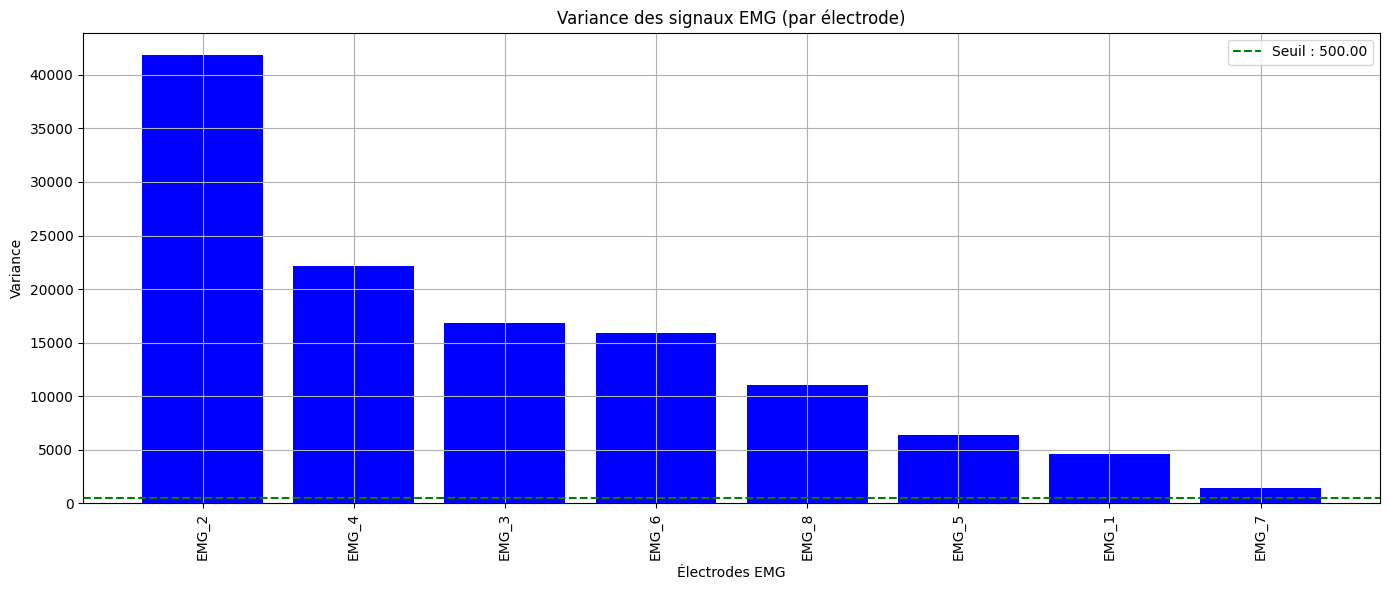

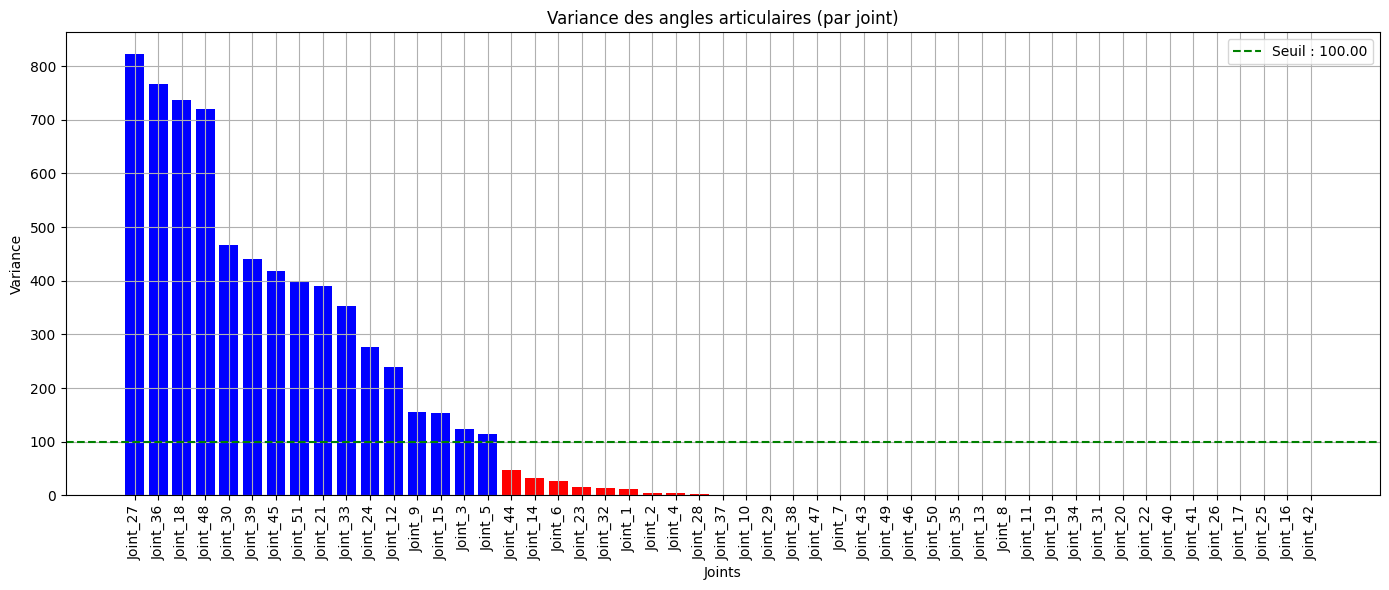

In [ ]:
emg_variances_df, joints_variances_df = analyze_and_plot_variances(
    dataX_session=dataX[0],    # Exemple : session 0
    dataY_session=dataY[0],
    threshold_emg=500,
    threshold_joints=100
)

# Data preparation (windows, features extraction,...)

Signal EMG brut (230000 x 8)

↓

Découpage en fenêtres glissantes (shape : [nb_fenêtres, 500, 8])

↓

Features extraction sur chaque fenêtre (shape : [nb_fenêtres, nb_features])

↓

Préparation des cibles (shape : [nb_fenêtres, 51])

↓

Train/test split (par exemple 80%/20% ou par session)

↓

Feature Selection (fit sur training uniquement, appliquée sur test aussi)

↓

Feature Scaling (normalisation, fit sur training uniquement)

↓

Entraînement du modèle


**Missing values**

In [ ]:
import numpy as np

def impute_missing_with_mean(dataX, dataY):
    """
    Remplace les NaNs dans dataX avec la moyenne par colonne (électrode),
    et retourne les mêmes objets au format np.ndarray, avec shape conservée.

    Args:
        dataX: np.ndarray of shape (n_sessions, T, 8)
        dataY: np.ndarray of shape (n_sessions, T, 51)

    Returns:
        dataX_filled, dataY (inchangé)
    """
    dataX_filled = np.copy(dataX)  # évite de modifier l’original

    for session in range(dataX.shape[0]):
        session_data = dataX_filled[session]  # shape (T, 8)
        for col in range(session_data.shape[1]):
            col_data = session_data[:, col]
            if np.isnan(col_data).any():
                mean_val = np.nanmean(col_data)
                col_data[np.isnan(col_data)] = mean_val
                dataX_filled[session, :, col] = col_data  # remettre à jour

    return dataX_filled, dataY

In [ ]:
#dataX, dataY= impute_missing_with_mean(dataX, dataY)

**Windows creation**

In [ ]:
def create_windows_and_targets_all_sessions(dataX, dataY, stride, window_size=500, target_position='end'):
    """
    Retourne X de shape (N, 500, 8) — comme demandé.

    Args:
        dataX: np.ndarray shape (5, T, 8)
        dataY: np.ndarray shape (5, T, 51)
        window_size: longueur de chaque fenêtre
        stride: pas de déplacement
        target_position: 'center' ou 'end'

    Returns:
        X_all: np.ndarray shape (N, 500, 8)
        y_all: np.ndarray shape (N, 51)
        indices_all: liste des indices (session, début)
    """
    X_all = []
    y_all = []
    indices_all = []

    n_sessions = dataX.shape[0]

    for session in range(n_sessions):
        X_session = dataX[session]  # (T, 8)
        Y_session = dataY[session]  # (T, 51)

        T = X_session.shape[0]
        for i in range(0, T - window_size + 1, stride):
            x_win = X_session[i:i + window_size]  # ✅ (500, 8) — pas de transpose

            if target_position == 'center':
                target_idx = i + window_size // 2
            elif target_position == 'end':
                target_idx = i + window_size - 1
            else:
                raise ValueError("target_position must be 'center' or 'end'")

            y_target = Y_session[target_idx]

            X_all.append(x_win)
            y_all.append(y_target)
            indices_all.append((session, i))

    X_all = np.array(X_all)  # (N, 500, 8)
    y_all = np.array(y_all)

    print(f"Fenêtrage terminé : X = {X_all.shape}, Y = {y_all.shape}")
    return X_all, y_all, indices_all


In [ ]:
"""
X_windows, y_windows, _ = create_windows_and_targets_all_sessions(dataX, dataY, window_size=500, stride=100, target_position='end')
# Vérification de l'overlap : la ligne 320 de la fenêtre 87 doit être la même que la ligne 220 de la fenêtre 88
fenetre_87 = X_windows[87]
fenetre_88 = X_windows[88]

match = np.allclose(fenetre_87[320], fenetre_88[220])
print(f"Vérification d'overlap entre fenêtre 87[320] et 88[220] : {'✅ Identiques' if match else '❌ Différentes'}")
"""

Fenêtrage terminé : X = (11480, 500, 8), Y = (11480, 51)
Vérification d'overlap entre fenêtre 87[320] et 88[220] : ✅ Identiques


# Features extraction

In [ ]:
def extract_emg_features(X_windows, mpr_threshold=0.01):
    feature_list = []

    for window in X_windows:  # shape: (500, 8)
        features = []
        for i in range(window.shape[1]):  # pour chaque électrode
            x = window[:, i]

            mav = np.mean(np.abs(x))
            rms = np.sqrt(np.mean(x ** 2))
            var = np.var(x)
            std = np.std(x)
            zc = np.sum(np.diff(np.sign(x)) != 0)
            mpr = np.sum(np.abs(x) > mpr_threshold) / len(x)

            features.extend([mav, rms, var, std, zc, mpr])
        feature_list.append(features)

    return np.array(feature_list)  # shape: (n_windows, 6 * 8)

In addition to standard time-domain features, additional descriptors such as waveform length and Willison amplitude were extracted to better characterize muscle activation patterns. Feature correlation analysis was also performed to identify and potentially remove redundant information

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis

def extract_emg_features_bis(X_windows, mpr_threshold=0.01, wamp_threshold=0.01):
    """
    Extraction avancée des features EMG à partir de fenêtres.

    Parameters:
    - X_windows: np.array (n_windows, 500, 8)
    - mpr_threshold: seuil pour Myopulse Rate
    - wamp_threshold: seuil pour Willison Amplitude

    Returns:
    - feature_array: np.array (n_windows, 10 * 8)
    """
    feature_list = []

    for window in X_windows:  # (500, 8)
        features = []
        for i in range(window.shape[1]):  # pour chaque électrode
            x = window[:, i]

            # --- Features classiques ---
            mav = np.mean(np.abs(x))
            rms = np.sqrt(np.mean(x ** 2))
            var = np.var(x)
            std = np.std(x)
            zc = np.sum(np.diff(np.sign(x)) != 0)
            mpr = np.sum(np.abs(x) > mpr_threshold) / len(x)

            # --- Nouvelles features ---
            wl = np.sum(np.abs(np.diff(x)))  # Waveform Length
            wamp = np.sum(np.abs(np.diff(x)) > wamp_threshold)  # Willison Amplitude
            skewness = skew(x)
            kurt = kurtosis(x)

            # Ajouter toutes les features
            features.extend([mav, rms, var, std, zc, mpr, wl, wamp, skewness, kurt])

        feature_list.append(features)

    return np.array(feature_list)  # shape: (n_windows, 10 * 8)

PyRieman

In [ ]:
!pip install pyriemann

Tu vois encore que X_windows a la forme (n_windows, 500, 8), alors que PyRiemann veut (n_windows, 8, 500).

In [ ]:
import numpy as np
import itertools

def get_top_emg_relations(X_windows, top_k=20):
    """
    Classement des relations EMG les plus fortes basées sur la covariance.

    Args:
        X_windows (np.ndarray): shape (n_windows, 8, 500) (attention : bien (n_windows, electrodes, time))
        top_k (int): nombre de paires à afficher

    Returns:
        List of tuples: (electrode_i, electrode_j, moyenne_covariance)
    """

    # --- 1. Estimation de toutes les matrices de covariance
    covmats = [np.cov(window) for window in X_windows]  # chaque window donne (8,8)
    covmats = np.array(covmats)  # (n_windows, 8, 8)

    # --- 2. Moyenne des covariances sur toutes les fenêtres
    mean_cov = np.mean(covmats, axis=0)  # (8, 8)

    # --- 3. Stocker les paires (i, j) + valeur
    relations = []
    for i, j in itertools.combinations(range(8), 2):  # que i < j pour éviter doublons
        value = mean_cov[i, j]
        relations.append((i, j, value))

    # --- 4. Trier par valeur absolue décroissante
    relations_sorted = sorted(relations, key=lambda x: abs(x[2]), reverse=True)

    # --- 5. Retourner les top_k
    return relations_sorted[:top_k]


In [ ]:
# Suppose que tu as déjà X_windows prêt (n_windows, 8, 500)
X_windows = np.transpose(X_windows, (0, 2, 1))  # (n_windows, 8, 500)
top_relations = get_top_emg_relations(X_windows, top_k=20)

for idx, (i, j, value) in enumerate(top_relations):
    print(f"{idx+1:2d}. Electrode {i} - Electrode {j} : covariance moyenne = {value:.4f}")


 1. Electrode 1 - Electrode 3 : covariance moyenne = -627.5701
 2. Electrode 1 - Electrode 2 : covariance moyenne = -622.2224
 3. Electrode 0 - Electrode 1 : covariance moyenne = 349.5985
 4. Electrode 4 - Electrode 5 : covariance moyenne = 291.7147
 5. Electrode 5 - Electrode 6 : covariance moyenne = 210.5835
 6. Electrode 0 - Electrode 2 : covariance moyenne = 181.6788
 7. Electrode 1 - Electrode 5 : covariance moyenne = 112.2011
 8. Electrode 2 - Electrode 3 : covariance moyenne = 106.0413
 9. Electrode 4 - Electrode 7 : covariance moyenne = -104.8065
10. Electrode 1 - Electrode 6 : covariance moyenne = -92.4512
11. Electrode 1 - Electrode 4 : covariance moyenne = -76.9516
12. Electrode 4 - Electrode 6 : covariance moyenne = 74.7426
13. Electrode 2 - Electrode 7 : covariance moyenne = 65.7689
14. Electrode 2 - Electrode 6 : covariance moyenne = 54.3966
15. Electrode 0 - Electrode 4 : covariance moyenne = -53.9968
16. Electrode 3 - Electrode 7 : covariance moyenne = 53.6820
17. Elect

In [ ]:
import numpy as np
import itertools

def get_top_emg_correlations(X_windows, top_k=20):
    """
    Classement des relations EMG les plus fortes basées sur la corrélation de Pearson.

    Args:
        X_windows (np.ndarray): shape (n_windows, 8, 500)
        top_k (int): nombre de paires à afficher

    Returns:
        List of tuples: (electrode_i, electrode_j, correlation_moyenne)
    """

    # --- 1. Calculer les matrices de corrélation sur chaque fenêtre
    corrmats = [np.corrcoef(window) for window in X_windows]  # (8, 8) pour chaque fenêtre
    corrmats = np.array(corrmats)  # (n_windows, 8, 8)

    # --- 2. Moyenne des corrélations sur toutes les fenêtres
    mean_corr = np.mean(corrmats, axis=0)  # (8, 8)

    # --- 3. Extraire toutes les paires uniques (i, j) sans doublons
    relations = []
    for i, j in itertools.combinations(range(8), 2):
        value = mean_corr[i, j]
        relations.append((i, j, value))

    # --- 4. Trier par valeur absolue décroissante
    relations_sorted = sorted(relations, key=lambda x: abs(x[2]), reverse=True)

    # --- 5. Retourner les top_k
    return relations_sorted[:top_k]


In [ ]:
"""
# Suppose que tu as X_windows bien formaté (n_windows, 8, 500)
X_windows = np.transpose(X_windows, (0, 2, 1))  # (n_windows, 8, 500)
top_relations = get_top_emg_correlations(X_windows, top_k=10)

for idx, (i, j, value) in enumerate(top_relations):
    print(f"{idx+1:2d}. Electrode {i} - Electrode {j} : corrélation moyenne = {value:.4f}")
"""

'\n# Suppose que tu as X_windows bien formaté (n_windows, 8, 500)\nX_windows = np.transpose(X_windows, (0, 2, 1))  # (n_windows, 8, 500)\ntop_relations = get_top_emg_correlations(X_windows, top_k=10)\n\nfor idx, (i, j, value) in enumerate(top_relations):\n    print(f"{idx+1:2d}. Electrode {i} - Electrode {j} : corrélation moyenne = {value:.4f}")\n'

In [ ]:
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
import numpy as np

def extract_spatial_features(X_windows):
    """
    Extraction de features spatiales via Pyriemann (covariances + espace tangent).

    Args:
        X_windows (np.ndarray): (n_windows, window_size, n_electrodes)

    Returns:
        features (np.ndarray): (n_windows, n_spatial_features)
    """

    # --- Transposer pour avoir (n_windows, n_electrodes, window_size)
    X_windows = np.transpose(X_windows, (0, 2, 1))  # (n_windows, 8, 500)

    # --- Estimation des matrices de covariance
    covmats = Covariances(estimator='oas').transform(X_windows)  # (n_windows, 8, 8)

    # --- Passage dans l'espace tangent
    ts = TangentSpace()
    spatial_features = ts.fit_transform(covmats)  # (n_windows, 36)

    # --- Retour standard sous np.array
    return np.array(spatial_features)  # (n_windows, 36)


EXTRACT EVERYTHING

In [ ]:
def extract_everything(X_windows, mpr_threshold=0.01, wamp_threshold=0.01):
    """
    Extraction combinée : features EMG classiques + features spatiales Pyriemann.

    Args:
        X_windows (np.ndarray): (n_windows, 500, 8)

    Returns:
        features (np.ndarray): (n_windows, total_features)
    """

    # --- 1. Extraire features classiques
    features_classic = extract_emg_features_bis(X_windows, mpr_threshold, wamp_threshold)
    # shape: (n_windows, 80)

    # --- 2. Extraire features spatiales
    features_spatial = extract_spatial_features(X_windows)
    # shape: (n_windows, 36)

    # --- 3. Concaténer toutes les features
    features_combined = np.hstack((features_classic, features_spatial))
    # shape: (n_windows, 116)

    # --- 4. Retour sous np.array (même style que tes autres fonctions)
    return np.array(features_combined)  # (n_windows, 116)


Données finales

In [ ]:
def prepare_data(dataX, dataY, feature_extraction_function, window_size=500, stride=100, target_position='end'):
    """
    Prépare les données en appelant la fonction de fenêtrage, puis extrait les features.

    Parameters:
    - dataX: np.ndarray shape (5, T, 8)
    - dataY: np.ndarray shape (5, T, 51)
    - feature_extraction_function: fonction d'extraction de features à appliquer
    - window_size: taille de la fenêtre
    - stride: pas entre les fenêtres
    - target_position: 'start' / 'center' / 'end'

    Returns:
    - X_train: np.ndarray shape (N, n_features)
    - Y_train: np.ndarray shape (N, 51)
    """
    print("🚀 Création des fenêtres...")
    X_windows, Y_windows, _ = create_windows_and_targets_all_sessions(
        dataX, dataY, stride=stride, window_size=window_size, target_position=target_position
    )

    print("🧠 Extraction des features...")
    X_features = feature_extraction_function(X_windows)

    print(f"✅ X_train shape: {X_features.shape}")
    print(f"✅ Y_train shape: {Y_windows.shape}")
    return X_features, Y_windows

In [ ]:
#X_train, Y_train= prepare_data(dataX, dataY, extract_emg_features) #A1
X_train, Y_train= prepare_data(dataX, dataY, extract_emg_features_bis) #A2
#X_train, Y_train= prepare_data(dataX, dataY, extract_spatial_features)
#X_train, Y_train= prepare_data(dataX, dataY, extract_everything)

#X_train, Y_train= prepare_data(dataX_f, dataY, extract_emg_features)

🚀 Création des fenêtres...
Fenêtrage terminé : X = (11480, 500, 8), Y = (11480, 51)
🧠 Extraction des features...
✅ X_train shape: (11480, 80)
✅ Y_train shape: (11480, 51)


Drop les colonnes avec variance nulle

In [ ]:
import numpy as np
import pandas as pd

def drop_null_variance_targets(X_train, Y_train, verbose=True):
    """
    Supprime les colonnes de Y_train ayant variance nulle et ajuste X_train si besoin.

    Args:
        X_train (np.ndarray): Features
        Y_train (np.ndarray): Targets
        verbose (bool): Afficher les colonnes supprimées ou pas

    Returns:
        X_train_clean (np.ndarray): Features (inchangé ici)
        Y_train_clean (np.ndarray): Targets sans colonnes à variance nulle
        dropped_cols_idx (list): Liste des indices de colonnes supprimées
    """

    # 1. Calcul de la variance par colonne
    variances = np.var(Y_train, axis=0)

    # 2. Identifier les colonnes à variance nulle
    cols_to_drop = np.where(variances < 0.0001)[0].tolist()

    if verbose:
        if cols_to_drop:
            print(f"🧹 Colonnes de Y_train supprimées (variance nulle) : {cols_to_drop}")
        else:
            print("✅ Aucune colonne de Y_train supprimée (toutes ont une variance > 0)")

    # 3. Supprimer les colonnes nulles
    Y_train_clean = np.delete(Y_train, cols_to_drop, axis=1)

    return X_train, Y_train_clean, cols_to_drop

In [ ]:
X_train_0var, Y_train_0var, dropped_cols_idx = drop_null_variance_targets(X_train, Y_train)

🧹 Colonnes de Y_train supprimées (variance nulle) : [39, 40, 41]


In [ ]:
def drop_null_variance_features(X_train, threshold=1e-5, verbose=True):
    """
    Supprime les colonnes de X_train avec une variance quasi nulle.

    Returns:
        X_train_clean, dropped_feature_idx
    """
    variances = np.var(X_train, axis=0)
    cols_to_drop = np.where(variances < threshold)[0].tolist()

    if verbose:
        if cols_to_drop:
            print(f"🧹 Colonnes X supprimées (variance < {threshold}): {cols_to_drop}")
        else:
            print("✅ Aucune colonne X supprimée")

    X_train_clean = np.delete(X_train, cols_to_drop, axis=1)
    return X_train_clean, cols_to_drop

In [ ]:
X_train_clean, cols_to_dropX = drop_null_variance_features(X_train, threshold=1e-5, verbose=True)

🧹 Colonnes X supprimées (variance < 1e-05): [5, 15, 25, 35, 45, 55, 65, 75]


In [ ]:
def drop_null_variance_targets(Y_train, threshold=1e-5, verbose=True):
    variances = np.var(Y_train, axis=0)
    cols_dropped = np.where(variances < threshold)[0].tolist()
    means = np.mean(Y_train, axis=0)

    if verbose:
        if cols_dropped:
            print(f"🧹 Colonnes Y supprimées (variance < {threshold}): {cols_dropped}")
        else:
            print("✅ Aucune colonne supprimée")

    Y_train_clean = np.delete(Y_train, cols_dropped, axis=1)
    dropped_means = {col: means[col] for col in cols_dropped}

    return Y_train_clean, cols_dropped, dropped_means


In [ ]:
Y_train_clean, cols_dropped, dropped_means = drop_null_variance_targets(Y_train, threshold=1e-5, verbose=True)

🧹 Colonnes Y supprimées (variance < 1e-05): [39, 40, 41]


In [ ]:
pipeline_info = {
    "dropped_X_features": cols_to_dropX,                 # indices des features supprimées dans X
    "dropped_Y_targets": cols_dropped,                   # indices des targets supprimées dans Y
    "dropped_Y_means": dropped_means                     # moyennes des targets supprimées {index: mean}
}

print(pipeline_info['dropped_X_features'])
print(pipeline_info['dropped_Y_targets'])
print(pipeline_info['dropped_Y_means'])

[5, 15, 25, 35, 45, 55, 65, 75]
[39, 40, 41]
{39: np.float64(-23.30959905263593), 40: np.float64(17.705229362804822), 41: np.float64(-5.847499401518494)}


Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split 80% train, 20% test
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train_clean, Y_train_clean, test_size=0.2, random_state=42)

print("X_train split shape:", X_tr.shape)
print("X_test split shape:", X_val.shape)
print("Y_train split shape:", Y_tr.shape)
print("Y_test split shape:", Y_val.shape)
print(X_tr[0,0]) #Normalement on doit avoir 12.049405622566683

X_train split shape: (9184, 72)
X_test split shape: (2296, 72)
Y_train split shape: (9184, 48)
Y_test split shape: (2296, 48)
12.049405622566683


# Models

## Features selection


In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SelectFromModel

# K-fold cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Prépare les containers pour les résultats
rmse_filter = []
rmse_wrapper = []
rmse_embedded = []

# X = tes features (shape: n_samples x n_features)
# Y = tes targets (shape: n_samples x 51)
X = X_train
Y = Y_train

In [ ]:
for i in range(Y.shape[1]):
    y = Y[:, i]  # On travaille target par target

    pipe = Pipeline([
        ('select', SelectKBest(score_func=f_regression, k=20)),
        ('reg', Ridge())
    ])

    score = -np.mean(cross_val_score(pipe, X, y, scoring='neg_root_mean_squared_error', cv=cv))
    rmse_filter.append(score)


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Target': np.arange(1, 52),
    'RMSE_Filter': rmse_filter,
    'RMSE_Wrapper': rmse_wrapper,
    'RMSE_Embedded': rmse_embedded
})

results_df.head()

## Normalisation + PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

def prepare_data_with_pca(X_train, X_val, use_pca, n_components=30, plot_variance=False):
    """
    Normalisation + option PCA.

    Parameters:
    - X_train: np.array (features train)
    - X_val: np.array (features validation)
    - use_pca: bool, si True applique PCA en plus de la normalisation
    - n_components: nombre de composantes principales à conserver (si use_pca=True)

    Returns:
    - X_train_processed: np.array (train après normalisation + PCA si activé)
    - X_val_processed: np.array (test après normalisation + PCA si activé)
    - scaler: StandardScaler fit sur X_train
    - pca: PCA fit sur X_train (si PCA est utilisé)
    """
    # 1. Normalisation (toujours)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    if use_pca:
        # 2. PCA si demandé
        pca = PCA(n_components=n_components)
        X_train_processed = pca.fit_transform(X_train_scaled)
        X_val_processed = pca.transform(X_val_scaled)

        # 3. Visualisation de la variance expliquée
        if plot_variance:
            plt.figure(figsize=(8,5))
            plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
            plt.title('Variance cumulée expliquée par les composantes principales')
            plt.xlabel('Nombre de composantes principales')
            plt.ylabel('Variance expliquée cumulée')
            plt.grid()
            plt.show()
        return X_train_processed, X_val_processed #, scaler, pca
    else:
        # Si pas de PCA, juste la normalisation
        return X_train_scaled, X_val_scaled #, scaler, None

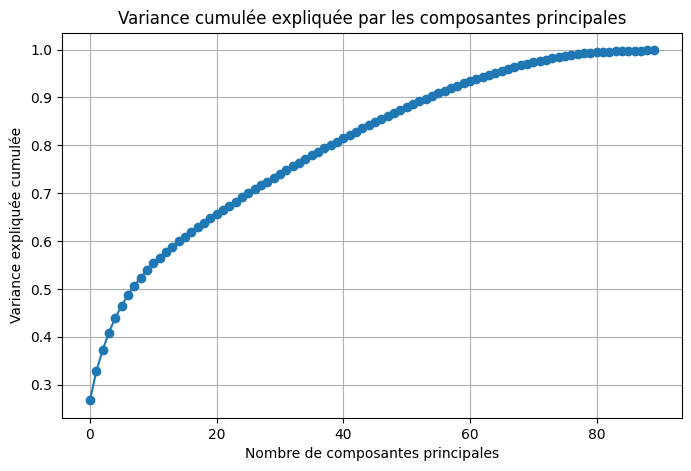

In [ ]:
X_tr_processed, X_val_processed = prepare_data_with_pca(X_tr, X_val, use_pca=False, n_components=50, plot_variance=True)
X_tr_pca, X_val_pca = prepare_data_with_pca(X_tr, X_val, use_pca=True, n_components=90, plot_variance=True)

## Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train
model = LinearRegression()
model.fit(X_tr, Y_tr)

# Predict
Y_pred = model.predict(X_val)

# Corrected evaluation
mse = mean_squared_error(Y_val, Y_pred, multioutput='raw_values')
mae = mean_absolute_error(Y_val, Y_pred, multioutput='raw_values')
r2 = r2_score(Y_val, Y_pred, multioutput='raw_values')
var_Y = np.var(Y_val, axis=0)
nmse = mse / var_Y

print("Métriques sur l'ensemble de validation :")
for i in range(Y_val.shape[1]):
    print(f"Sortie {i+1:02d} - MSE: {mse[i]:.4f}, MAE: {mae[i]:.4f}, R2: {r2[i]:.4f}, NMSE: {nmse[i]:.4f}")

print(f"\nMoyennes - MSE: {np.mean(mse):.4f}, MAE: {np.mean(mae):.4f}, R2: {np.mean(r2):.4f}, NMSE: {np.mean(nmse):.4f}")

# A1 Moyennes - MSE: 44.6422, MAE: 2.8317, R2: 0.6755, NMSE: 0.3245
# A2 Moyennes - MSE: 42.0387, MAE: 2.7361, R2: 0.6904, NMSE: 0.3096
# B1 Moyennes - MSE: 45.2332, MAE: 2.8332, R2: 0.6734, NMSE: 0.3266
# B2 Moyennes - MSE: 42.6705, MAE: 2.7363, R2: 0.6888, NMSE: 0.3112

Métriques sur l'ensemble de validation :
Sortie 01 - MSE: 2.7551, MAE: 1.2256, R2: 0.7725, NMSE: 0.2275
Sortie 02 - MSE: 0.4811, MAE: 0.4537, R2: 0.7782, NMSE: 0.2218
Sortie 03 - MSE: 25.0534, MAE: 3.6373, R2: 0.7785, NMSE: 0.2215
Sortie 04 - MSE: 0.1311, MAE: 0.2566, R2: 0.5552, NMSE: 0.4448
Sortie 05 - MSE: 12.0596, MAE: 2.5589, R2: 0.5213, NMSE: 0.4787
Sortie 06 - MSE: 3.1745, MAE: 1.3140, R2: 0.5195, NMSE: 0.4805
Sortie 07 - MSE: 0.1307, MAE: 0.2729, R2: 0.7680, NMSE: 0.2320
Sortie 08 - MSE: 0.0229, MAE: 0.1084, R2: 0.8123, NMSE: 0.1877
Sortie 09 - MSE: 33.1455, MAE: 4.3192, R2: 0.7771, NMSE: 0.2229
Sortie 10 - MSE: 0.5189, MAE: 0.5379, R2: 0.8262, NMSE: 0.1738
Sortie 11 - MSE: 0.0638, MAE: 0.1827, R2: 0.7605, NMSE: 0.2395
Sortie 12 - MSE: 88.3256, MAE: 6.9757, R2: 0.8250, NMSE: 0.1750
Sortie 13 - MSE: 0.0528, MAE: 0.1668, R2: 0.7715, NMSE: 0.2285
Sortie 14 - MSE: 3.3451, MAE: 1.3635, R2: 0.3910, NMSE: 0.6090
Sortie 15 - MSE: 86.1565, MAE: 6.7899, R2: 0.7245, NMSE: 0.2755
Sortie 16

Linear regression + cross val

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Suppose que X_tr, Y_tr existent (après ton split)

# 1. Créer le modèle
base_model = LinearRegression()
model = MultiOutputRegressor(base_model)

# 2. Définir les scorers custom
def mse_multioutput(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def mae_multioutput(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def r2_multioutput(y_true, y_pred):
    return r2_score(y_true, y_pred)

scoring = {
    'MSE': make_scorer(mse_multioutput, greater_is_better=False),
    'MAE': make_scorer(mae_multioutput, greater_is_better=False),
    'R2': make_scorer(r2_multioutput)
}

# 3. Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model, X_tr, Y_tr, cv=cv, scoring=scoring)

# 4. Résultats
mse_cv = -cv_results['test_MSE']
mae_cv = -cv_results['test_MAE']
r2_cv = cv_results['test_R2']

print("\nCross-validation 5-fold :")
print(f"MSE CV moyen: {np.mean(mse_cv):.4f} ± {np.std(mse_cv):.4f}")
print(f"MAE CV moyen: {np.mean(mae_cv):.4f} ± {np.std(mae_cv):.4f}")
print(f"R2 CV moyen: {np.mean(r2_cv):.4f} ± {np.std(r2_cv):.4f}")



Cross-validation 5-fold :
MSE CV moyen: 47.6536 ± 0.8244
MAE CV moyen: 2.9982 ± 0.0085
R2 CV moyen: 0.7173 ± 0.0048


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train
model = LinearRegression()
model.fit(X_tr_pca, Y_tr)

# Predict
Y_pred = model.predict(X_val_pca)

# Corrected evaluation
mse = mean_squared_error(Y_val, Y_pred, multioutput='raw_values')
mae = mean_absolute_error(Y_val, Y_pred, multioutput='raw_values')
r2 = r2_score(Y_val, Y_pred, multioutput='raw_values')
var_Y = np.var(Y_val, axis=0)
nmse = mse / var_Y

print("Métriques sur l'ensemble de validation :")
for i in range(Y_val.shape[1]):
    print(f"Sortie {i+1:02d} - MSE: {mse[i]:.4f}, MAE: {mae[i]:.4f}, R2: {r2[i]:.4f}, NMSE: {nmse[i]:.4f}")

print(f"\nMoyennes - MSE: {np.mean(mse):.4f}, MAE: {np.mean(mae):.4f}, R2: {np.mean(r2):.4f}, NMSE: {np.mean(nmse):.4f}")

Métriques sur l'ensemble de validation :
Sortie 01 - MSE: 9.7870, MAE: 2.5373, R2: 0.2697, NMSE: 0.7303
Sortie 02 - MSE: 3.3584, MAE: 1.4180, R2: 0.2055, NMSE: 0.7945
Sortie 03 - MSE: 104.1811, MAE: 8.2316, R2: 0.2588, NMSE: 0.7412
Sortie 04 - MSE: 2.7393, MAE: 1.2201, R2: 0.2321, NMSE: 0.7679
Sortie 05 - MSE: 88.9434, MAE: 7.4880, R2: 0.2017, NMSE: 0.7983
Sortie 06 - MSE: 21.5597, MAE: 3.7117, R2: 0.1971, NMSE: 0.8029
Sortie 07 - MSE: 0.3643, MAE: 0.4758, R2: 0.1948, NMSE: 0.8052
Sortie 08 - MSE: 0.1012, MAE: 0.2441, R2: 0.1937, NMSE: 0.8063
Sortie 09 - MSE: 100.4398, MAE: 7.8579, R2: 0.1945, NMSE: 0.8055
Sortie 10 - MSE: 1.3568, MAE: 0.9198, R2: 0.2128, NMSE: 0.7872
Sortie 11 - MSE: 0.1357, MAE: 0.2507, R2: 0.2023, NMSE: 0.7977
Sortie 12 - MSE: 220.4983, MAE: 11.5786, R2: 0.2129, NMSE: 0.7871
Sortie 13 - MSE: 0.1844, MAE: 0.3345, R2: 0.3028, NMSE: 0.6972
Sortie 14 - MSE: 28.2881, MAE: 4.1295, R2: 0.1220, NMSE: 0.8780
Sortie 15 - MSE: 138.3525, MAE: 8.9341, R2: 0.3514, NMSE: 0.6486
So

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def run_pca_evaluation(X_tr, Y_tr, X_val, Y_val, pc_list):
    """
    Évalue un modèle linéaire pour plusieurs valeurs de composantes principales PCA.

    Args:
        X_tr (np.ndarray): Données d'entraînement
        Y_tr (np.ndarray): Cibles d'entraînement
        X_val (np.ndarray): Données de validation
        Y_val (np.ndarray): Cibles de validation
        pc_list (list): Liste des nombres de composantes principales à tester

    Returns:
        results (pd.DataFrame): Résumé des résultats
    """
    results = []

    # Normalisation des données
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_val_scaled = scaler.transform(X_val)

    for n_components in pc_list:
        pca = PCA(n_components=n_components)
        X_tr_pca = pca.fit_transform(X_tr_scaled)
        X_val_pca = pca.transform(X_val_scaled)

        model = LinearRegression()
        model.fit(X_tr_pca, Y_tr)

        Y_pred = model.predict(X_val_pca)

        mse = mean_squared_error(Y_val, Y_pred, multioutput='raw_values')
        mae = mean_absolute_error(Y_val, Y_pred, multioutput='raw_values')
        r2 = r2_score(Y_val, Y_pred, multioutput='raw_values')
        var_Y = np.var(Y_val, axis=0)
        nmse = mse / var_Y

        results.append({
            "PC": n_components,
            "Var explained (%)": round(np.sum(pca.explained_variance_ratio_) * 100, 1),
            "MSE": round(np.mean(mse), 4),
            "MAE": round(np.mean(mae), 4),
            "R2": round(np.mean(r2), 4),
            "NMSE": round(np.mean(nmse), 4)
        })

    return pd.DataFrame(results)


pc_list = [30, 40, 50, 60, 70, 80]
results_df = run_pca_evaluation(X_tr, Y_tr, X_val, Y_val, pc_list)
print(results_df.to_string(index=False))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# 1. Créer le modèle
base_model = LinearRegression()
model = MultiOutputRegressor(base_model)

# 2. Définir les scorers custom
def mse_multioutput(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def mae_multioutput(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def r2_multioutput(y_true, y_pred):
    return r2_score(y_true, y_pred)

scoring = {
    'MSE': make_scorer(mse_multioutput, greater_is_better=False),
    'MAE': make_scorer(mae_multioutput, greater_is_better=False),
    'R2': make_scorer(r2_multioutput)
}

# 3. Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model, X_tr, Y_tr, cv=cv, scoring=scoring)

# 4. Résultats
mse_cv = -cv_results['test_MSE']
mae_cv = -cv_results['test_MAE']
r2_cv = cv_results['test_R2']

print("\nCross-validation 5-fold :")
print(f"MSE CV moyen: {np.mean(mse_cv):.4f} ± {np.std(mse_cv):.4f}")
print(f"MAE CV moyen: {np.mean(mae_cv):.4f} ± {np.std(mae_cv):.4f}")
print(f"R2 CV moyen: {np.mean(r2_cv):.4f} ± {np.std(r2_cv):.4f}")


## Fully connected Neural networks

In [ ]:
import torch
import torch.nn as nn

class FCNDenseRegressor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(FCNDenseRegressor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Conversion en tenseurs PyTorch
X_train_torch = torch.tensor(X_tr, dtype=torch.float32)
Y_train_torch = torch.tensor(Y_tr, dtype=torch.float32)
X_val_torch = torch.tensor(X_val, dtype=torch.float32)
Y_val_torch = torch.tensor(Y_val, dtype=torch.float32)

# Instanciation du modèle
model = FCNDenseRegressor(input_dim=X_tr.shape[1], output_dim=Y_tr.shape[1])

# Entraînement PyTorch normal
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002, weight_decay=1e-4)

batch_size = 64

train_dataset = TensorDataset(X_train_torch, Y_train_torch)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
epochs = 100
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

for epoch in range(epochs):
    model.train()
    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        Y_pred_batch = model(X_batch)
        loss = criterion(Y_pred_batch, Y_batch)
        loss.backward()
        optimizer.step()

    scheduler.step()  # Reduce LR every 30 epochs

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 92.5919
Epoch 10, Loss: 54.3869
Epoch 20, Loss: 83.6051
Epoch 30, Loss: 39.7515
Epoch 40, Loss: 31.7661
Epoch 50, Loss: 58.6370
Epoch 60, Loss: 64.6728
Epoch 70, Loss: 54.2825
Epoch 80, Loss: 60.6953
Epoch 90, Loss: 82.6017
Epoch 100, Loss: 63.4799


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Mise en mode évaluation
model.eval()

# Désactiver le calcul du gradient
with torch.no_grad():
    Y_pred_val_torch = model(X_val_torch)

# Conversion en numpy pour les métriques scikit-learn
Y_pred_val = Y_pred_val_torch.cpu().numpy()
Y_val_np = Y_val_torch.cpu().numpy()

# Calcul des métriques
mse = mean_squared_error(Y_val_np, Y_pred_val, multioutput='raw_values')
mae = mean_absolute_error(Y_val_np, Y_pred_val, multioutput='raw_values')
r2 = r2_score(Y_val_np, Y_pred_val, multioutput='raw_values')
var_Y = np.var(Y_val_np, axis=0)
nmse = mse / var_Y

# Affichage
print("\n📊 Évaluation sur l'ensemble de validation :")
for i in range(Y_val_np.shape[1]):
    print(f"Sortie {i+1:02d} - MSE: {mse[i]:.4f}, MAE: {mae[i]:.4f}, R2: {r2[i]:.4f}, NMSE: {nmse[i]:.4f}")

print(f"\n🎯 Moyennes - MSE: {np.mean(mse):.4f}, MAE: {np.mean(mae):.4f}, R2: {np.mean(r2):.4f}, NMSE: {np.mean(nmse):.4f}")



📊 Évaluation sur l'ensemble de validation :
Sortie 01 - MSE: 6.4451, MAE: 1.8240, R2: 0.4679, NMSE: 0.5321
Sortie 02 - MSE: 6.1286, MAE: 1.9901, R2: -1.8251, NMSE: 2.8251
Sortie 03 - MSE: 60.7114, MAE: 5.3679, R2: 0.4634, NMSE: 0.5366
Sortie 04 - MSE: 1.9722, MAE: 1.1122, R2: -5.6889, NMSE: 6.6889
Sortie 05 - MSE: 24.5982, MAE: 3.4631, R2: 0.0236, NMSE: 0.9764
Sortie 06 - MSE: 6.2154, MAE: 1.7587, R2: 0.0593, NMSE: 0.9407
Sortie 07 - MSE: 0.7379, MAE: 0.6834, R2: -0.3092, NMSE: 1.3092
Sortie 08 - MSE: 0.2260, MAE: 0.3753, R2: -0.8536, NMSE: 1.8536
Sortie 09 - MSE: 109.7714, MAE: 7.1148, R2: 0.2619, NMSE: 0.7381
Sortie 10 - MSE: 1.7528, MAE: 0.9680, R2: 0.4131, NMSE: 0.5869
Sortie 11 - MSE: 0.2257, MAE: 0.3253, R2: 0.1533, NMSE: 0.8467
Sortie 12 - MSE: 224.3862, MAE: 9.5423, R2: 0.5555, NMSE: 0.4445
Sortie 13 - MSE: 0.0406, MAE: 0.1306, R2: 0.8243, NMSE: 0.1757
Sortie 14 - MSE: 4.7803, MAE: 1.5972, R2: 0.1296, NMSE: 0.8704
Sortie 15 - MSE: 104.7325, MAE: 7.0098, R2: 0.6651, NMSE: 0.334

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# 1. Définition du modèle CNN
class EMGCNN(nn.Module):
    def __init__(self, input_channels=8, input_length=500, output_dim=51):
        super(EMGCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=32, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm1d(32)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm1d(64)
        self.pool = nn.MaxPool1d(2)

        conv_output_length = input_length // 2  # après 1 pooling
        self.fc1 = nn.Linear(64 * conv_output_length, 128)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, output_dim)

    def forward(self, x):
        # x: (batch_size, 8, 500)
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # (batch, 32, 250)
        x = F.relu(self.bn2(self.conv2(x)))             # (batch, 64, 250)
        x = x.view(x.size(0), -1)                       # flatten: (batch, 64*250)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)                                 # (batch, 51)
        return x


In [ ]:
print(X_tr.shape)


(10784, 116)


In [ ]:
    model.eval()
    with torch.no_grad():
        Y_pred_val = model(X_val_torch)
        val_loss = criterion(Y_pred_val, Y_val_torch).item()

    print(f"Epoch {epoch+1}, Train Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}")
